In [16]:
from PIL import Image
import numpy as np

In [3]:
image = Image.open('../images/P1150598-1.jpg')

In [24]:
lab_image = image.convert('LAB') #no need à priori, mais just to make sure

In [25]:
# Split the LAB image into L, A, B channels
L, A, B = lab_image.split()

In [26]:
# Example: Save the L channel as a grayscale image
L.save('lightness_channel.jpg')

In [28]:
# To access pixel values of L channel
L_pixels = L.load()
x, y = 10, 20  # Coordinates
l_value = L_pixels[x, y]
print(f'L value at ({x}, {y}): {l_value}')

L value at (10, 20): 174


In [35]:
# Alternatively, you can get all the pixel data as a list
L_pixels_list = np.array(L.getdata())
L_pixels_list.shape


(15833216,)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

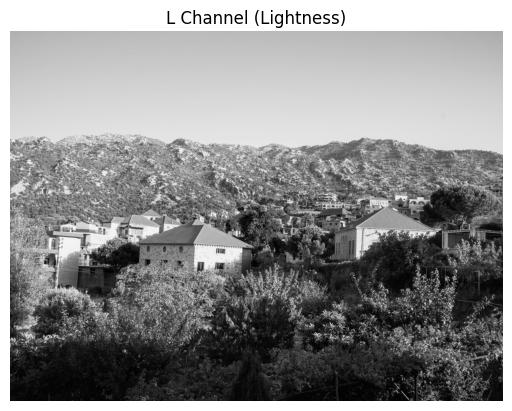

In [43]:
# Display the L channel as a grayscale image
plt.imshow(L, cmap='gray')
plt.title('L Channel (Lightness)')
plt.axis('off')
plt.show()

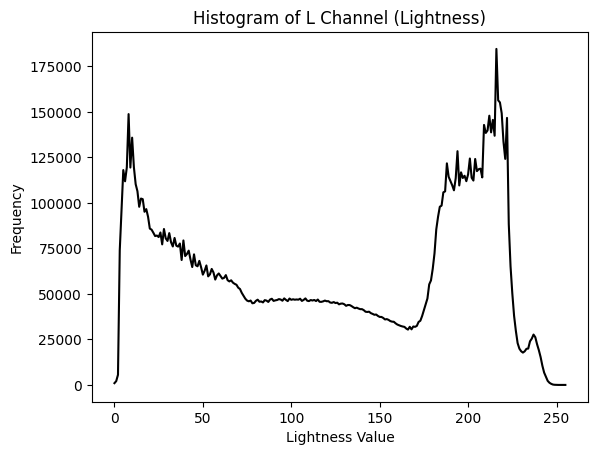

In [44]:
# Get the histogram of the L channel
L_hist = L.histogram()

# Plot the histogram
plt.plot(L_hist, color='black')
plt.title('Histogram of L Channel (Lightness)')
plt.xlabel('Lightness Value')
plt.ylabel('Frequency')
plt.show()

Description: A line plot can show how the lightness changes along a specific path or row in the image. The x-axis represents the pixel position along the path, and the y-axis represents the lightness value.
Use Case: This is useful for analyzing the change in lightness across a specific section of the image, such as across a horizon or an edge.

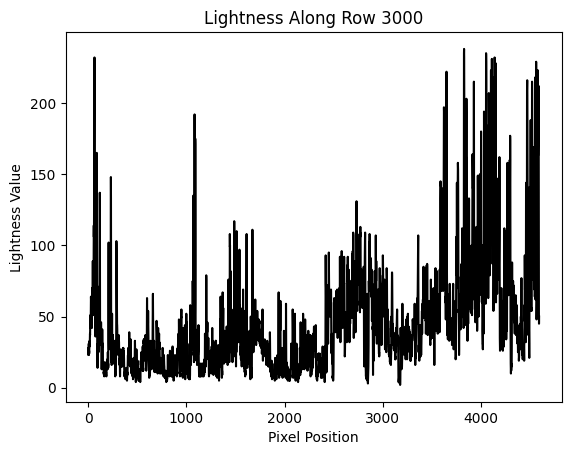

In [59]:
import matplotlib.pyplot as plt

# Choose a row (y-coordinate) to plot the lightness values along
y = 3000
L_row = [L.getpixel((x, y)) for x in range(L.width)]

# Plot the lightness values along the chosen row
plt.plot(L_row, color='black')
plt.title('Lightness Along Row {}'.format(y))
plt.xlabel('Pixel Position')
plt.ylabel('Lightness Value')
plt.show()

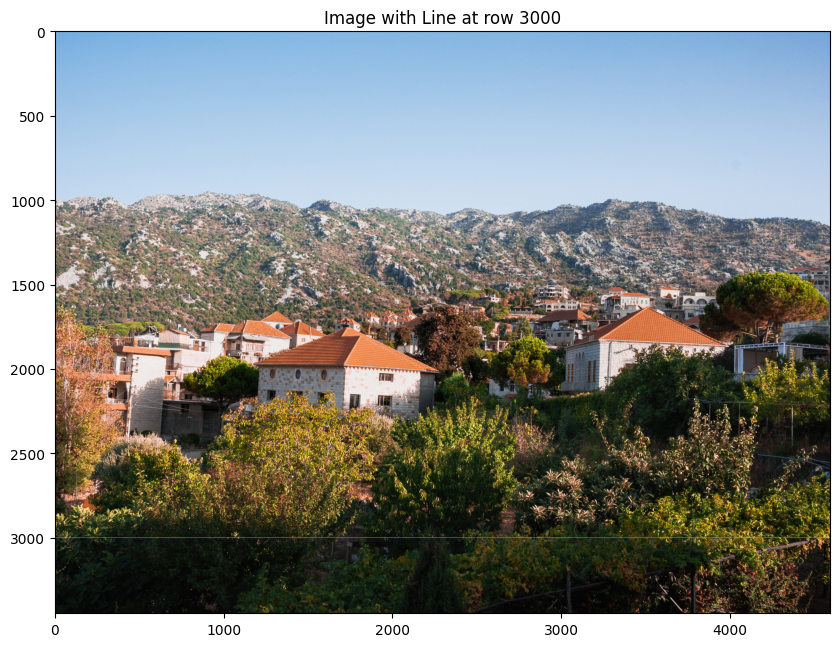

In [60]:
from PIL import ImageDraw

# Create a copy of the original image to draw on
image_with_line = image.copy()

# Draw a horizontal line across the chosen row
draw = ImageDraw.Draw(image_with_line)
draw.line((0, y, image.width, y), fill='red', width=2)

# Step 3: Display the original image with the line overlay
plt.figure(figsize=(10, 8))
plt.imshow(image_with_line)
plt.title(f'Image with Line at row {y}')
plt.axis('on')
plt.show()

In [63]:
from PIL import Image
import numpy as np

def analyze_tonal_range(image_path, num_bins=5):
    # Open image and convert to grayscale
    img = Image.open(image_path).convert('L')

    # Convert image to numpy array
    img_array = np.array(img)

    # Create bins
    bins = np.linspace(0, 255, num_bins + 1)

    # Categorize pixels into bins
    indices = np.digitize(img_array, bins)

    # Calculate statistics for each bin
    for i in range(1, num_bins + 1):
        pixels_in_bin = np.sum(indices == i)
        avg_luminance = np.mean(img_array[indices == i])
        percentage = pixels_in_bin / img_array.size * 100

        print(f"Bin {i}:")
        print(f"  Pixel count: {pixels_in_bin}")
        print(f"  Average luminance: {avg_luminance:.2f}")
        print(f"  Percentage: {percentage:.2f}%")
        print()

# Usage
analyze_tonal_range('../images/P1150598-1.jpg', num_bins=5)

Bin 1:
  Pixel count: 4531721
  Average luminance: 25.96
  Percentage: 28.62%

Bin 2:
  Pixel count: 2754123
  Average luminance: 74.40
  Percentage: 17.39%

Bin 3:
  Pixel count: 2116194
  Average luminance: 125.31
  Percentage: 13.37%

Bin 4:
  Pixel count: 3994130
  Average luminance: 183.15
  Percentage: 25.23%

Bin 5:
  Pixel count: 2437048
  Average luminance: 214.79
  Percentage: 15.39%



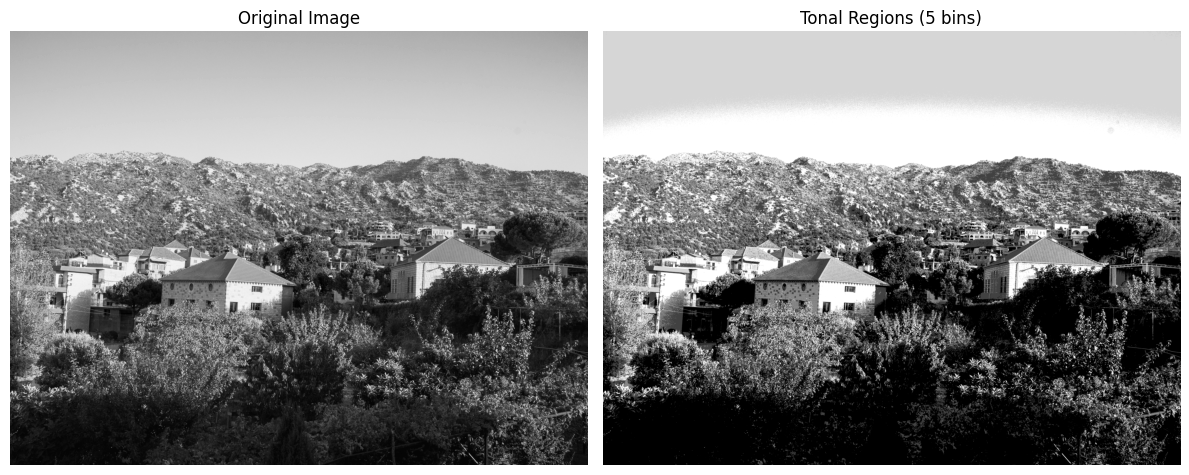

Bin 1:
  Pixel count: 4531721
  Average luminance: 25.96
  Percentage: 28.62%

Bin 2:
  Pixel count: 2754123
  Average luminance: 74.40
  Percentage: 17.39%

Bin 3:
  Pixel count: 2116194
  Average luminance: 125.31
  Percentage: 13.37%

Bin 4:
  Pixel count: 3994130
  Average luminance: 183.15
  Percentage: 25.23%

Bin 5:
  Pixel count: 2437048
  Average luminance: 214.79
  Percentage: 15.39%



In [66]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_visualize_tonal_range(image_path, num_bins=5):
    # Open image and convert to grayscale
    img = Image.open(image_path).convert('L')

    # Convert image to numpy array
    img_array = np.array(img)

    # Create bins
    bins = np.linspace(0, 255, num_bins + 1)

    # Categorize pixels into bins
    indices = np.digitize(img_array, bins)

    # Calculate average luminance for each bin
    bin_averages = []
    for i in range(1, num_bins + 1):
        pixels_in_bin = img_array[indices == i]
        if len(pixels_in_bin) > 0:
            avg_luminance = np.mean(pixels_in_bin)
        else:
            avg_luminance = (bins[i-1] + bins[i]) / 2  # Use bin midpoint if empty
        bin_averages.append(avg_luminance)

    # Create new image with bin averages
    new_img_array = np.zeros_like(img_array)
    for i, avg in enumerate(bin_averages, 1):
        new_img_array[indices == i] = avg

    # Convert back to PIL Image
    new_img = Image.fromarray(new_img_array.astype(np.uint8))

    # Display original and new images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.imshow(img, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(new_img, cmap='gray')
    ax2.set_title(f'Tonal Regions ({num_bins} bins)')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    # Save the new image
    new_img.save('tonal_regions.png')

    # Print bin statistics
    for i, avg in enumerate(bin_averages, 1):
        pixels_in_bin = np.sum(indices == i)
        percentage = pixels_in_bin / img_array.size * 100

        print(f"Bin {i}:")
        print(f"  Pixel count: {pixels_in_bin}")
        print(f"  Average luminance: {avg:.2f}")
        print(f"  Percentage: {percentage:.2f}%")
        print()

# Usage
analyze_and_visualize_tonal_range('../images/P1150598-1.jpg', num_bins=5)

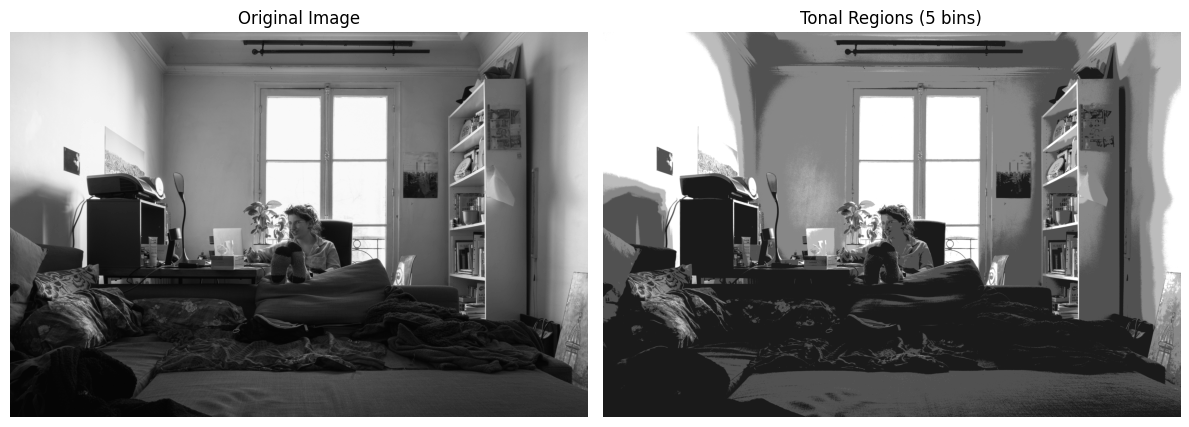

Bin 1:
  Pixel count: 10982766
  Average luminance: 24.43
  Percentage: 30.44%

Bin 2:
  Pixel count: 8904017
  Average luminance: 75.78
  Percentage: 24.68%

Bin 3:
  Pixel count: 8026351
  Average luminance: 124.55
  Percentage: 22.24%

Bin 4:
  Pixel count: 2350750
  Average luminance: 173.06
  Percentage: 6.51%

Bin 5:
  Pixel count: 5819676
  Average luminance: 235.67
  Percentage: 16.13%



In [69]:
analyze_and_visualize_tonal_range('../images/DSC02466.jpg', num_bins=5)

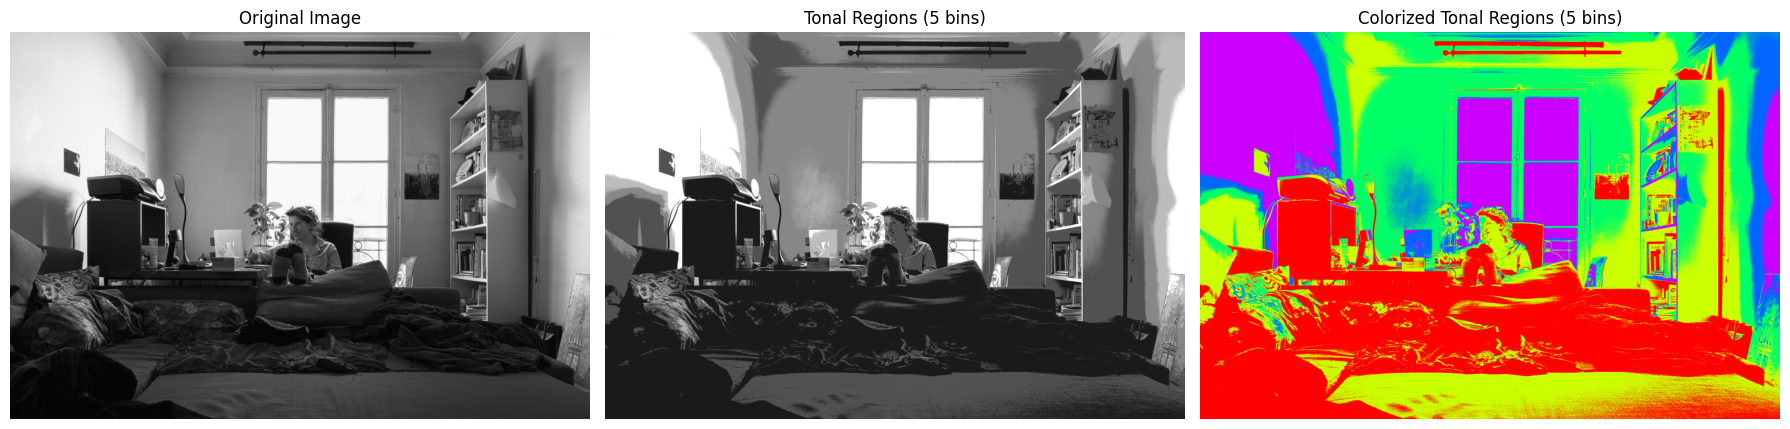

In [72]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import colorsys

def analyze_and_visualize_tonal_range(image_path, num_bins=5):
    # ... (keep the existing code up to the 'Display original and new images' part)
     # Open image and convert to grayscale
    img = Image.open(image_path).convert('L')

    # Convert image to numpy array
    img_array = np.array(img)

    # Create bins
    bins = np.linspace(0, 255, num_bins + 1)

    # Categorize pixels into bins
    indices = np.digitize(img_array, bins)

    # Calculate average luminance for each bin
    bin_averages = []
    for i in range(1, num_bins + 1):
        pixels_in_bin = img_array[indices == i]
        if len(pixels_in_bin) > 0:
            avg_luminance = np.mean(pixels_in_bin)
        else:
            avg_luminance = (bins[i-1] + bins[i]) / 2  # Use bin midpoint if empty
        bin_averages.append(avg_luminance)

    # Create new image with bin averages
    new_img_array = np.zeros_like(img_array)
    for i, avg in enumerate(bin_averages, 1):
        new_img_array[indices == i] = avg

    # Convert back to PIL Image
    new_img = Image.fromarray(new_img_array.astype(np.uint8))
    # Generate distinct colors for each bin
    colors = [colorsys.hsv_to_rgb(i/num_bins, 1.0, 1.0) for i in range(num_bins)]
    colors = [(int(r*255), int(g*255), int(b*255)) for r, g, b in colors]

    # Create colorized image
    colorized_img_array = np.zeros((img_array.shape[0], img_array.shape[1], 3), dtype=np.uint8)
    for i, color in enumerate(colors, 1):
        colorized_img_array[indices == i] = color

    # Convert colorized array to PIL Image
    colorized_img = Image.fromarray(colorized_img_array)

    # Display original, grayscale tonal, and colorized tonal images
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    ax1.imshow(img, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(new_img, cmap='gray')
    ax2.set_title(f'Tonal Regions ({num_bins} bins)')
    ax2.axis('off')

    ax3.imshow(colorized_img)
    ax3.set_title(f'Colorized Tonal Regions ({num_bins} bins)')
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

    # Save the new images
    new_img.save('tonal_regions_gray.png')
    colorized_img.save('tonal_regions_color.png')

    # ... (keep the existing code for printing bin statistics)

# Usage
analyze_and_visualize_tonal_range('../images/DSC02466.jpg', num_bins=5)

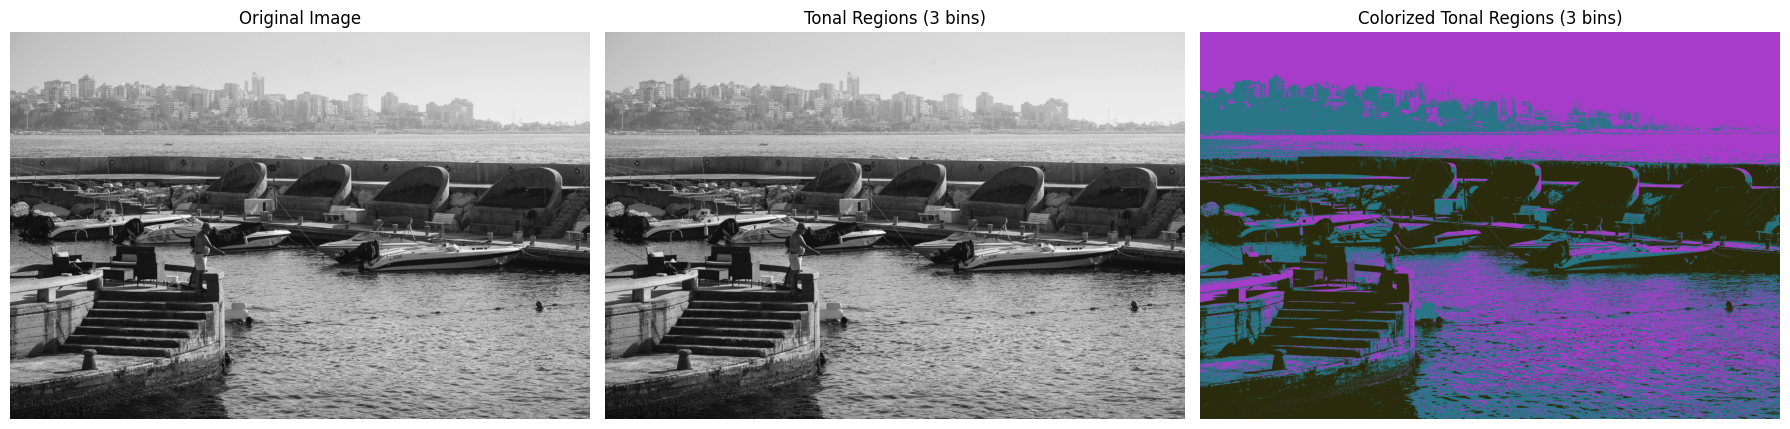

Bin 1:
  Pixel count: 13393785
  Average luminance: 43.87
  Percentage: 32.10%

Bin 2:
  Pixel count: 11582439
  Average luminance: 134.52
  Percentage: 27.76%

Bin 3:
  Pixel count: 16743637
  Average luminance: 202.33
  Percentage: 40.13%



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import colorsys

def analyze_and_visualize_tonal_range(image_path, num_bins=5):
    # Open image and convert to grayscale
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)

    # Create bins and categorize pixels
    bins = np.linspace(0, 255, num_bins + 1)
    indices = np.digitize(img_array, bins)

    # Calculate average luminance for each bin
    bin_averages = []
    for i in range(1, num_bins + 1):
        pixels_in_bin = img_array[indices == i]
        avg_luminance = np.mean(pixels_in_bin) if len(pixels_in_bin) > 0 else (bins[i-1] + bins[i]) / 2
        bin_averages.append(avg_luminance)

    # Generate colors for each bin, preserving brightness
    colors = []
    for avg_luminance in bin_averages:
        hue = avg_luminance / 255  # Use luminance to determine hue
        saturation = 0.7  # Fixed saturation for better visibility
        value = avg_luminance / 255  # Preserve original brightness
        rgb = colorsys.hsv_to_rgb(hue, saturation, value)
        colors.append(tuple(int(x * 255) for x in rgb))

    # Create colorized image
    colorized_img_array = np.zeros((img_array.shape[0], img_array.shape[1], 3), dtype=np.uint8)
    for i, color in enumerate(colors, 1):
        colorized_img_array[indices == i] = color

    # Convert to PIL Images
    new_img = Image.fromarray(img_array)
    colorized_img = Image.fromarray(colorized_img_array)

    # Display images
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    ax1.imshow(img, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(new_img, cmap='gray')
    ax2.set_title(f'Tonal Regions ({num_bins} bins)')
    ax2.axis('off')

    ax3.imshow(colorized_img)
    ax3.set_title(f'Colorized Tonal Regions ({num_bins} bins)')
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

    # Save images
    new_img.save('tonal_regions_gray.png')
    colorized_img.save('tonal_regions_color.png')

    # Print bin statistics
    for i, avg in enumerate(bin_averages, 1):
        pixels_in_bin = np.sum(indices == i)
        percentage = pixels_in_bin / img_array.size * 100
        print(f"Bin {i}:")
        print(f"  Pixel count: {pixels_in_bin}")
        print(f"  Average luminance: {avg:.2f}")
        print(f"  Percentage: {percentage:.2f}%")
        print()

# Usage
analyze_and_visualize_tonal_range('../images/_DSC8666-2.jpg', num_bins=3)